15 & 16 

Write a program to find the minium of$$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
1. Monte Carlo method
2. Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the wikipedia page
3. from your own code (except Monte Carlo)
4. from scipy

Min_Monte Carlo Method:  5.9258925274925726e-08


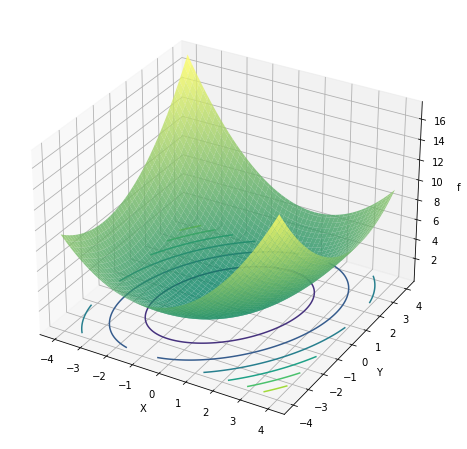

In [57]:
#2D function with Monte Carlo method
import numpy as np 
import matplotlib.pyplot as plt

#Function (Used throughout HWK)
def f1(x,y):
    return ((x*x)/2) + ((y*y)/3) - ((x*y)/4)

points_n = []
n = 1000000
#generate random numbers for points_n 
for i in range(n):
    x = np.random.random()
    y = np.random.random()
    points = f1(x,y)
    points_n.append(points)
    
print("Min_Monte Carlo Method: ", min(points_n))

#%matplotlib notebook 
#Graph from Lecture notes
from mpl_toolkits.mplot3d import Axes3D

#range x,y
x_min, x_max = -4, 4
y_min, y_max = -4, 4

#replaced original function with defined above

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f1(x, y)
fig = plt.figure(figsize=(12,8))                  #blowup image size
ax = fig.gca(projection='3d')                     #project image
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)  #plot saddle surface
cset = ax.contour(x,y,z, zdir='z', offset=0)      #plot floor
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()



Min_Gradient Descent:  4.8838125e-07


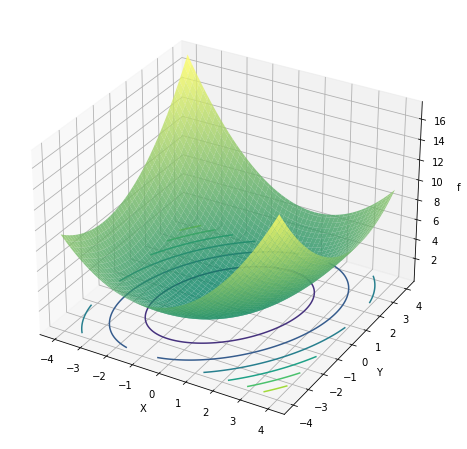

In [96]:
#2D function using the gradient decent method with variable step size

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#define function from 1d to 2d 
def fvs(x,y):
    return ((x*x)/2) + ((y*y)/3) - ((x*y)/4)

#define derived function(add component y)
def derivative(f, x, y, dx = 0.1, dy = 0.1):
    return (fvs(x+dx,0)-fvs(x,0))/dx + (fvs(0,y+dy)-fvs(0,y))/dy
#min func. incorperate y comp. 
def minimize(f, x0, y0, N=1000):
    
    x_now = x0
    y_now = y0
    x_prev = None
    y_prev = None
    converged = False
    
    for i in range(N):
        if x_prev == None and y_prev == None:  
            dx = 0.001
            dy = 0.001
        else:
            dfx = dfy = derivative(fvs, x_now, y_now) - derivative(fvs, x_prev, y_now)
            dx = (x_now - x_prev)/dfx
            dy = (y_now - y_prev)/dfy
            
        x_next = x_now - derivative(f, x_now, y_now)*dx
        y_next = y_now - derivative(f, x_now, y_now)*dx

        if fvs(x_next, y_next) < f(x_now, y_now):
            x_prev = x_now
            x_now = x_next
            y_prev = y_now
            y_now = y_next

        else:
            converged = True
            break
    return converged, fvs(x_now, y_now)

#converged, x_best, f_min, i = minimize2(f, x0)
#print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min, 'cycles:', i)
print("Min_Gradient Descent: ", minimize(f, 0.001, 0.001, N = 1000)[1]) #[1] to isolate minimum value


from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -4, 4                         # range of x
y_min, y_max = -4, 4                          # range of y

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = fvs(x,y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

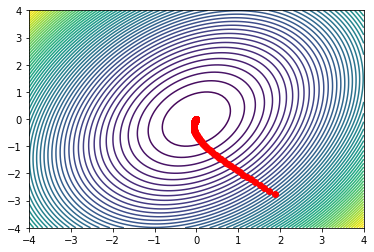

Min_fixed step Method:  2.198659817496376e-24   Iterations:   1001
[ 1.87125901 -2.7435052 ] 5.543197601145314
[-1.35548382e-12 -2.53274470e-12] 2.198659817496376e-24


In [82]:
#Gradient descent with fixed step size (Code solution for min. not Variable or Monte Carlo)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def f2(x): #complex function with 2 minimum
    return x[0]*x[0]/2 + x[1]*x[1]/3 - x[0]*x[1]/4 
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
    
def init(x_min, x_max, y_min, y_max):             
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

# variable stepwidth

def minimize_fix(f,x0, N=1000):
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)


[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print("Min_fixed step Method: ", f_min, '  Iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))

In [83]:
#Scipy
from scipy.optimize import minimize

def f2(x):
    return ((x[0]*x[0])/2) + ((x[1]*x[1])/3) - ((x[0]*x[1])/4)

[x0, y0] = init(x_min, x_max, y_min, y_max)

print("Scipy_Nelder-mead:")
res = minimize(fsp, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

print("Scipy_CG:")
res = minimize(fsp, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

print("Scipy_BFGS:")
res = minimize(fsp, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

print("Scipy_Nelder-mead:")
res = minimize(fsp, [x0,y0], method='powell', tol=1e-4, options={'disp': True})


Scipy_Nelder-mead:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 85
Scipy_CG:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7
Scipy_BFGS:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
Scipy_Nelder-mead:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 91
